In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
infy = pd.read_csv("C:\\Projects\\StockMarket-Data-Analysis-Vizualization\\infy_stock.csv")
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [3]:
infy = infy.round(2)
infy.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691,9.870306e+13,14908,258080,0.52
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580,3.394669e+14,54166,1249104,0.74


In [5]:
infy.shape

(248, 15)

In [6]:
infy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.2+ KB

In [7]:
infy.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [8]:
infy.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
infy[infy.Open.isnull()]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble


In [10]:
infy.dropna(inplace = True, axis = 0)

In [11]:
infy.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [12]:
infy['Date'] = pd.to_datetime(infy['Date'])
infy.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691,9.870306e+13,14908,258080,0.52
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580,3.394669e+14,54166,1249104,0.74


In [13]:
infy['Date'].max() - infy['Date'].min()

Timedelta('364 days 00:00:00')

In [14]:
infy.iloc[-90:].describe().astype(int)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,90,90,90,90,90,90,90,90,90,90,90,90
mean,1101,1103,1115,1088,1100,1100,1101,3728711,-2147483648,102212,2361387,0
std,36,36,37,34,36,36,35,2020165,-2147483648,51250,1156763,0
min,1020,1030,1045,1011,1020,1020,1027,353652,-2147483648,13196,166222,0
25%,1079,1083,1095,1059,1078,1079,1080,2580362,-2147483648,70343,1640231,0
50%,1099,1100,1110,1088,1100,1099,1099,3406647,-2147483648,90322,2090428,0
75%,1131,1129,1143,1113,1130,1129,1131,4539271,-2147483648,125313,3092886,0
max,1181,1199,1219,1162,1181,1181,1179,15202485,-2147483648,347437,5605100,0


In [15]:
infy.index = infy['Date']

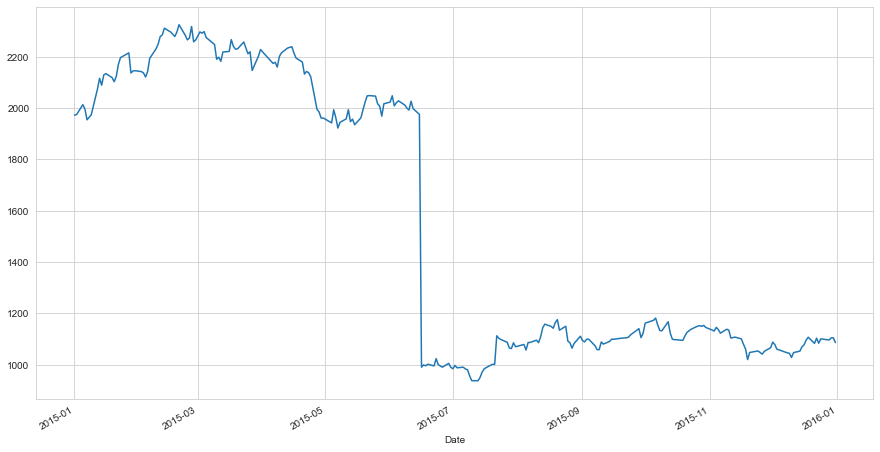

In [17]:
sns.set_style('whitegrid')
infy['Prev Close'].plot(figsize = (15,8))
plt.show()

In [19]:
infy['Day_Perc_Change'] = infy['Prev Close'].pct_change()*100  

In [20]:
infy['Day_Perc_Change'] = infy['Day_Perc_Change'].fillna(0)      
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day_Perc_Change
Date,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.52,0.000000
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.74,0.093787
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.74,1.965154
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.73,-0.859328
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.73,-2.089283


<AxesSubplot:xlabel='Date'>

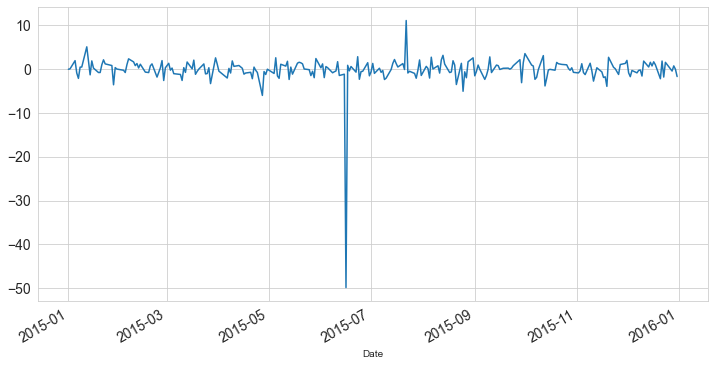

In [21]:
infy['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 14)

In [22]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'

infy['Trend'] = np.zeros(infy['Day_Perc_Change'].count())
infy['Trend'] = infy['Day_Perc_Change'].apply(lambda x: trend(x))

In [23]:
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.52,0.000000,Slight or No change
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.74,0.093787,Slight or No change
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.74,1.965154,Positive
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.73,-0.859328,Slight Negative
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.73,-2.089283,Negative


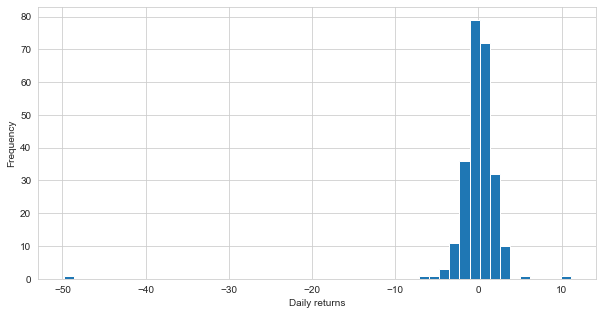

count    248.000000
mean      -0.149100
std        3.592785
min      -49.851902
25%       -0.858712
50%        0.015429
75%        1.144820
max       11.126092
Name: Day_Perc_Change, dtype: float64

In [24]:
infy['Day_Perc_Change'].hist(bins = 50, figsize = (10,5))   
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()

infy.Day_Perc_Change.describe()

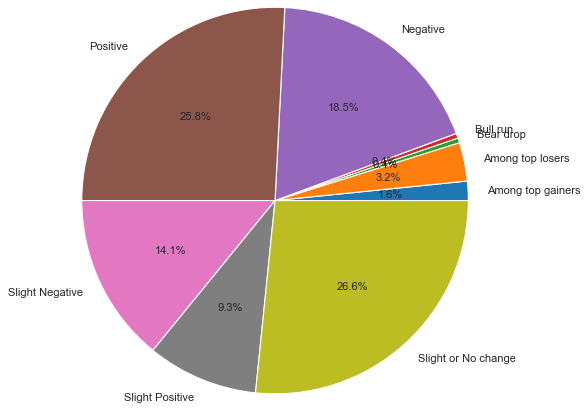

In [26]:
fig = plt.figure(dpi = 80)
infy_pie_data = infy.groupby('Trend')
pie_label = sorted([i for i in infy.loc[:, 'Trend'].unique()])
plt.pie(infy_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)
plt.show()

<AxesSubplot:xlabel='Date'>

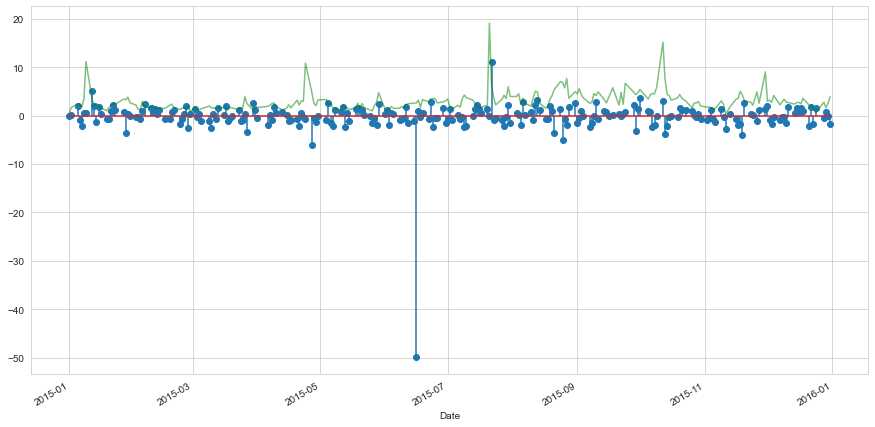

In [27]:
plt.stem(infy['Date'], infy['Day_Perc_Change'])
(infy['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)

In [30]:
import pandas_datareader.data as web
start = datetime.datetime(2018, 2, 15)
end = datetime.datetime(2020, 2, 14) 
combined_df = web.DataReader(['HDFC.NS', 'JINDALSTEL.NS', 'JUBLFOOD.NS', 
                              'SUNPHARMA.NS', 'TCS.NS', '^NSEI'],
                              'yahoo', start = start, end = end)['Adj Close']
combined_df.head()

Symbols,HDFC.NS,JINDALSTEL.NS,JUBLFOOD.NS,SUNPHARMA.NS,TCS.NS,^NSEI
Date,,,,,,
2018-02-15,1704.119629,263.536835,198.565887,552.590393,1339.389648,10545.500000
2018-02-16,1691.078857,249.781479,192.619446,552.110596,1342.685669,10452.299805
2018-02-19,1689.728394,248.291733,196.784424,538.817688,1338.359741,10378.400391
2018-02-20,1687.585938,250.278061,197.115051,536.994141,1348.041504,10360.400391
2018-02-21,1699.741577,245.610184,196.434052,504.601654,1392.697876,10397.450195


In [31]:
combined_df.isnull().sum()

Symbols
HDFC.NS          0
JINDALSTEL.NS    0
JUBLFOOD.NS      0
SUNPHARMA.NS     0
TCS.NS           0
^NSEI            2
dtype: int64

In [32]:
combined_df.dropna(inplace = True, axis = 0)
combined_df.isnull().sum()

Symbols
HDFC.NS          0
JINDALSTEL.NS    0
JUBLFOOD.NS      0
SUNPHARMA.NS     0
TCS.NS           0
^NSEI            0
dtype: int64

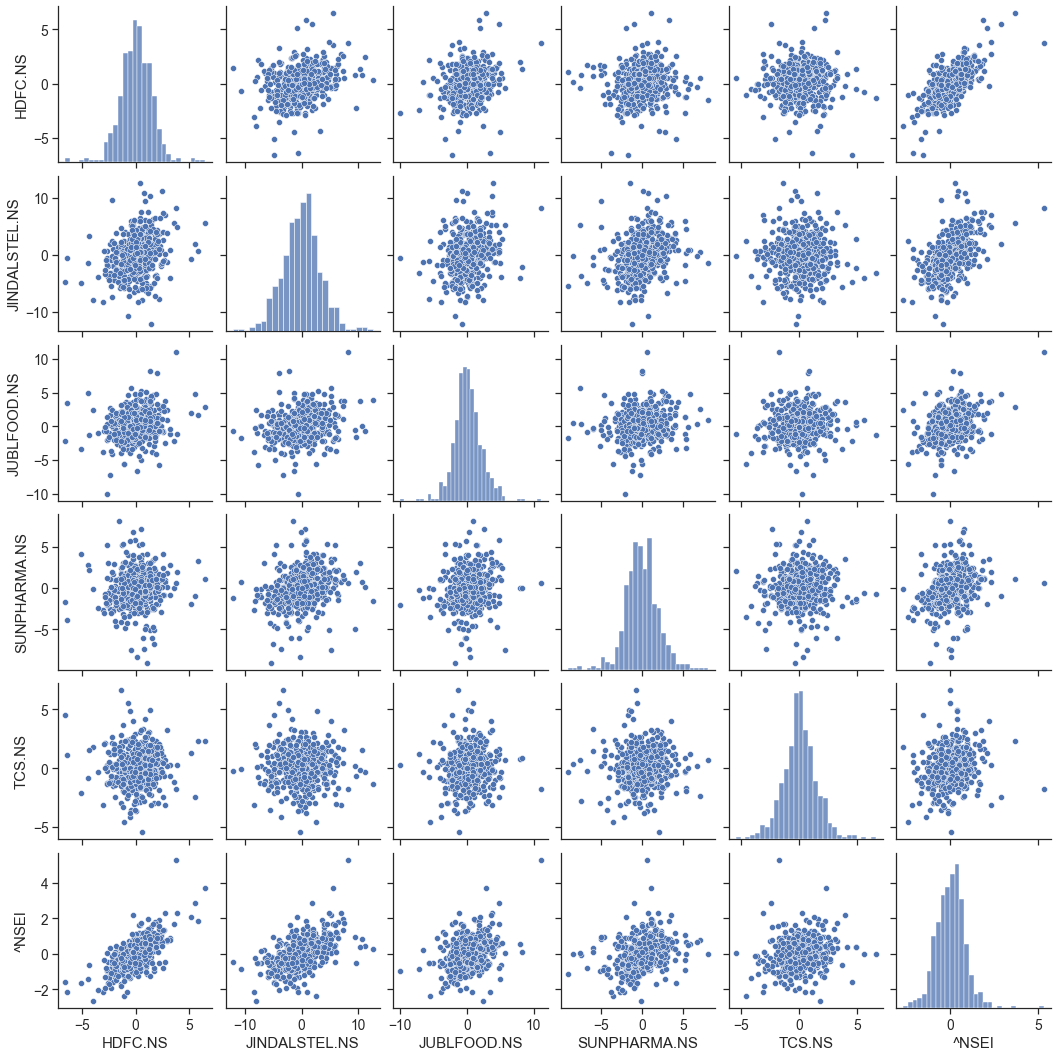

In [33]:
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)

import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

<AxesSubplot:xlabel='Date'>

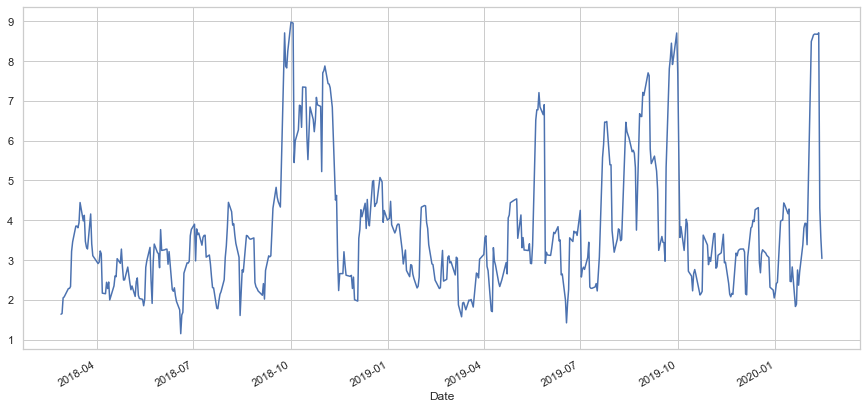

In [35]:
sns.set(style = 'whitegrid')
HDFC_vol = pct_chg_df['HDFC.NS'].rolling(7).std()*np.sqrt(7)
HDFC_vol.plot(figsize = (15,7))

<AxesSubplot:xlabel='Date'>

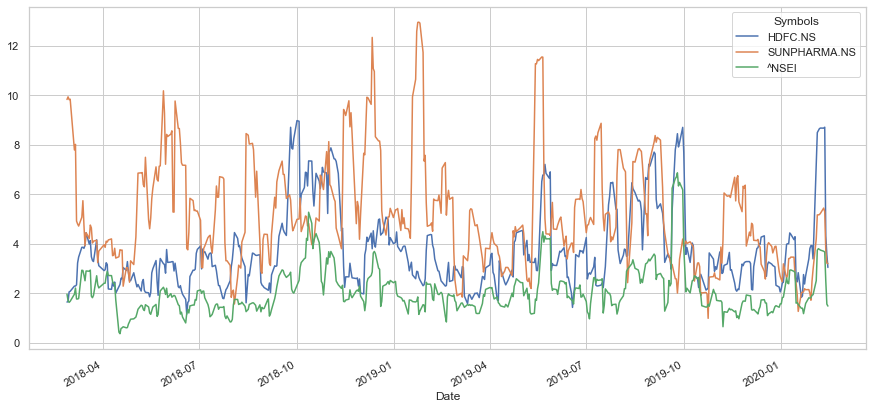

In [36]:
volatiliy = pct_chg_df[['HDFC.NS', 'SUNPHARMA.NS', '^NSEI']].rolling(7).std()*np.sqrt(7)
volatiliy.plot(figsize = (15, 7))